# BERT for agriculture classification

In [5]:
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Final_classification_code /Agriclassification/agriculture_news2.csv', engine='python')

In [8]:
dataset.shape

(2002, 5)

In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.0 MB/s eta 0:00:00


In [10]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification, TFBertForSequenceClassification
from transformers import AutoTokenizer
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast

In [11]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [12]:
data_path = '/content/drive/MyDrive/Final_classification_code /Agriclassification/agriculture_news2.csv'

In [13]:
import numpy as np

from sklearn.model_selection import train_test_split

In [14]:
def get_train_ds(data_path, batch_size=8):
  data = pd.read_csv(data_path)
  data = data.sample(len(data)) # optionally sample a subset of the data
  print(f"Total Data: {len(data)}")
  X, y = list(data.NewsArticleText), list(data.label)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  train_encodings = tokenizer(X_train, truncation=True, padding=True)
  train_ds = tf.data.Dataset.from_tensor_slices((
      dict(train_encodings),
      y_train
  ))

  test_encodings = tokenizer(X_test, truncation=True, padding=True)
  test_ds = tf.data.Dataset.from_tensor_slices((
      dict(test_encodings),
      y_test
  ))

  train_ds = train_ds.batch(batch_size)
  test_ds = test_ds.batch(batch_size)

  return train_ds, test_ds

train_ds, test_ds = get_train_ds(data_path)

Total Data: 2002


In [15]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=tf.metrics.SparseCategoricalAccuracy()
              ) # can also use any keras loss fn

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
 model.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
188/188 [==============================] - 204s 970ms/step - loss: 0.1538 - sparse_categorical_accuracy: 0.9460
Epoch 2/10
188/188 [==============================] - 183s 972ms/step - loss: 0.0724 - sparse_categorical_accuracy: 0.9767
Epoch 3/10
188/188 [==============================] - 183s 974ms/step - loss: 0.0482 - sparse_categorical_accuracy: 0.9893
Epoch 4/10
188/188 [==============================] - 183s 972ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9860
Epoch 5/10
188/188 [==============================] - 183s 975ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9947
Epoch 6/10
188/188 [==============================] - 183s 972ms/step - loss: 0.0356 - sparse_categorical_accuracy: 0.9900
Epoch 7/10
188/188 [==============================] - 183s 974ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9920
Epoch 8/10
188/188 [==============================] - 183s 974ms/step - loss: 0.0116 - sparse_categorical_accuracy: 0.9980
Epoch 9/10
188/1

In [ ]:
model.evaluate(test_ds)

63/63 [==============================] - 24s 331ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9780


[0.15451781451702118, 0.9780439138412476]

In [ ]:
predictions = model.predict(test_ds, verbose=1)

63/63 [==============================] - 25s 333ms/step


In [ ]:
y_true = []
for x, y, in test_ds:
  for y_ in y:
    y_true.append(y_)

In [ ]:
y_predict = np.argmax(predictions.logits, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_true , y_predict)

In [ ]:
import seaborn as sns

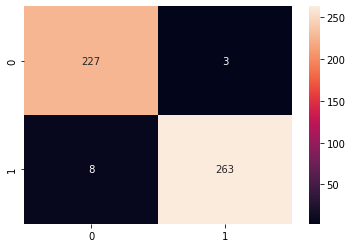

In [ ]:
sns.heatmap(cm , annot=True ,fmt='2')

In [ ]:
from sklearn.metrics import classification_report

# target_names = ['class 0', 'class 1']
target_names = ['Non-agriculture', 'Agriculture']

print(classification_report(y_true, y_predict, target_names=target_names))

                 precision    recall  f1-score   support

Non-agriculture       0.97      0.99      0.98       230
    Agriculture       0.99      0.97      0.98       271

       accuracy                           0.98       501
      macro avg       0.98      0.98      0.98       501
   weighted avg       0.98      0.98      0.98       501



In [ ]:
# out_model_path = "/content/drive/MyDrive/Final_classification_model_saved/Time/"
# tokenizer.save_pretrained(f"{out_model_path}")
# model.save_pretrained(f"{out_model_path}")